# Part 1 
## Exercise 3: Temporal patterns

- To start off easily, let's count the number of crimes per year:
    - What is the year with most crimes?
    - What is the year with the fewest crimes?.
- Create a barplot of crimes-per-year (years on the x-axis, crime-counts on the y-axis).
- Finally, Police chief Suneman is interested in the temporal development of only a subset of categories, the so-called *focus crimes*. Those categories are listed below (for convenient copy-paste action). Create bar-charts displaying the year-by-year development of each of these categories across the years 2003-2017.

## Loading Data 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../Assignment-1/Data/SF_Crime_Data_Focus_Cleaned.csv', parse_dates=["Incident Date"])

## The year with the most and fewest crime from 2003 - 2025 

In [ ]:
# Define current year for partial data
current_year = 2025

# Ensure the 'Incident Date' column is in datetime format
df["Incident Date"] = pd.to_datetime(df["Incident Date"])

# Count crimes per year
crimes_per_year = df["Incident Date"].dt.year.value_counts().sort_index()

# Crimes in incomplete year 2025
crimes_2025 = crimes_per_year.get(current_year, 0)

# Year with most crimes (excluding incomplete 2025)
year_most_crimes = crimes_per_year[crimes_per_year.index < current_year].idxmax()
num_most_crimes = crimes_per_year[year_most_crimes]

# Year with fewest crimes (excluding incomplete 2025)
year_fewest_crimes = crimes_per_year[crimes_per_year.index < current_year].idxmin()
num_fewest_crimes = crimes_per_year[year_fewest_crimes]

print(f"📅 Year with the most crimes: {year_most_crimes} ({num_most_crimes} crimes)")
print(f"📅 Year with the fewest crimes: {year_fewest_crimes} ({num_fewest_crimes} crimes)")

crimes_2025 = crimes_per_year.get(current_year, 0)
print(f"📅 Crimes in the incomplete year {current_year}: {crimes_2025}")


📅 Year with the most crimes: 2017 (93149 crimes)
📅 Year with the fewest crimes: 2024 (61322 crimes)
📅 Crimes in the incomplete year 2025: 5994


## Barplot for crime pr year 

/var/folders/lr/_ynnd4hs17b6vnnx6lbz3hzh0000gn/T/ipykernel_84835/3702355666.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crimes_per_year.index, y=crimes_per_year.values, palette="Blues_d")


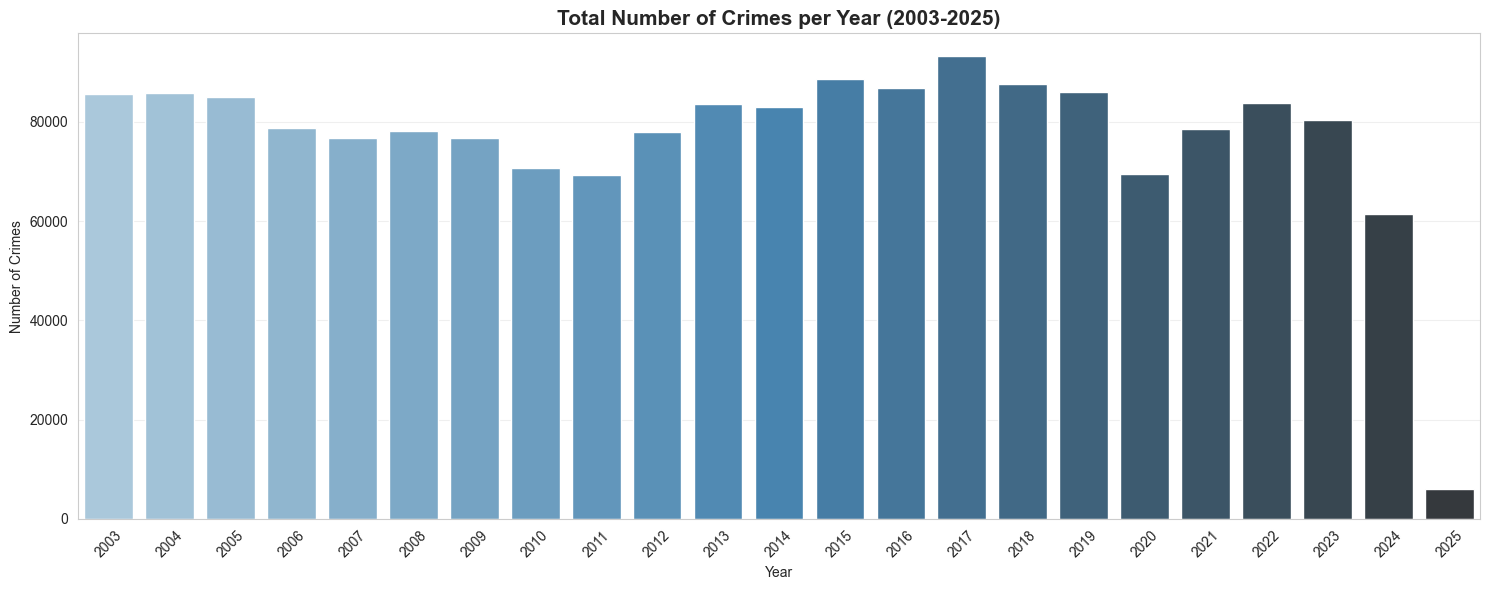

In [8]:
plt.figure(figsize=(15, 6))
sns.barplot(x=crimes_per_year.index, y=crimes_per_year.values, palette="Blues_d")

plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.title("Total Number of Crimes per Year (2003-2025)", fontsize=15, fontweight="bold")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


The analysis of crime frequency from 2003 to 2025 shows a notable trend in the number of reported incidents over the years. The peak year for crime activity was 2017, with a significant 93,149 crimes recorded, making it the year with the highest number of incidents. After 2017, crime numbers began to decrease, with 2024 reaching the lowest crime count in the observed period, totaling 61,322 reported crimes.

As of 2025, data collection is ongoing, and the total number of crimes reported thus far is 5,994. Given that the year is not yet complete, these numbers are subject to change, but the current figures indicate a continued decline compared to previous years.

## Bar chart displaying the year-by-year development of each categories across the years 2003-2025.

/var/folders/lr/_ynnd4hs17b6vnnx6lbz3hzh0000gn/T/ipykernel_84835/1668584997.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_focus["Year"] = df_focus["Incident Date"].dt.year


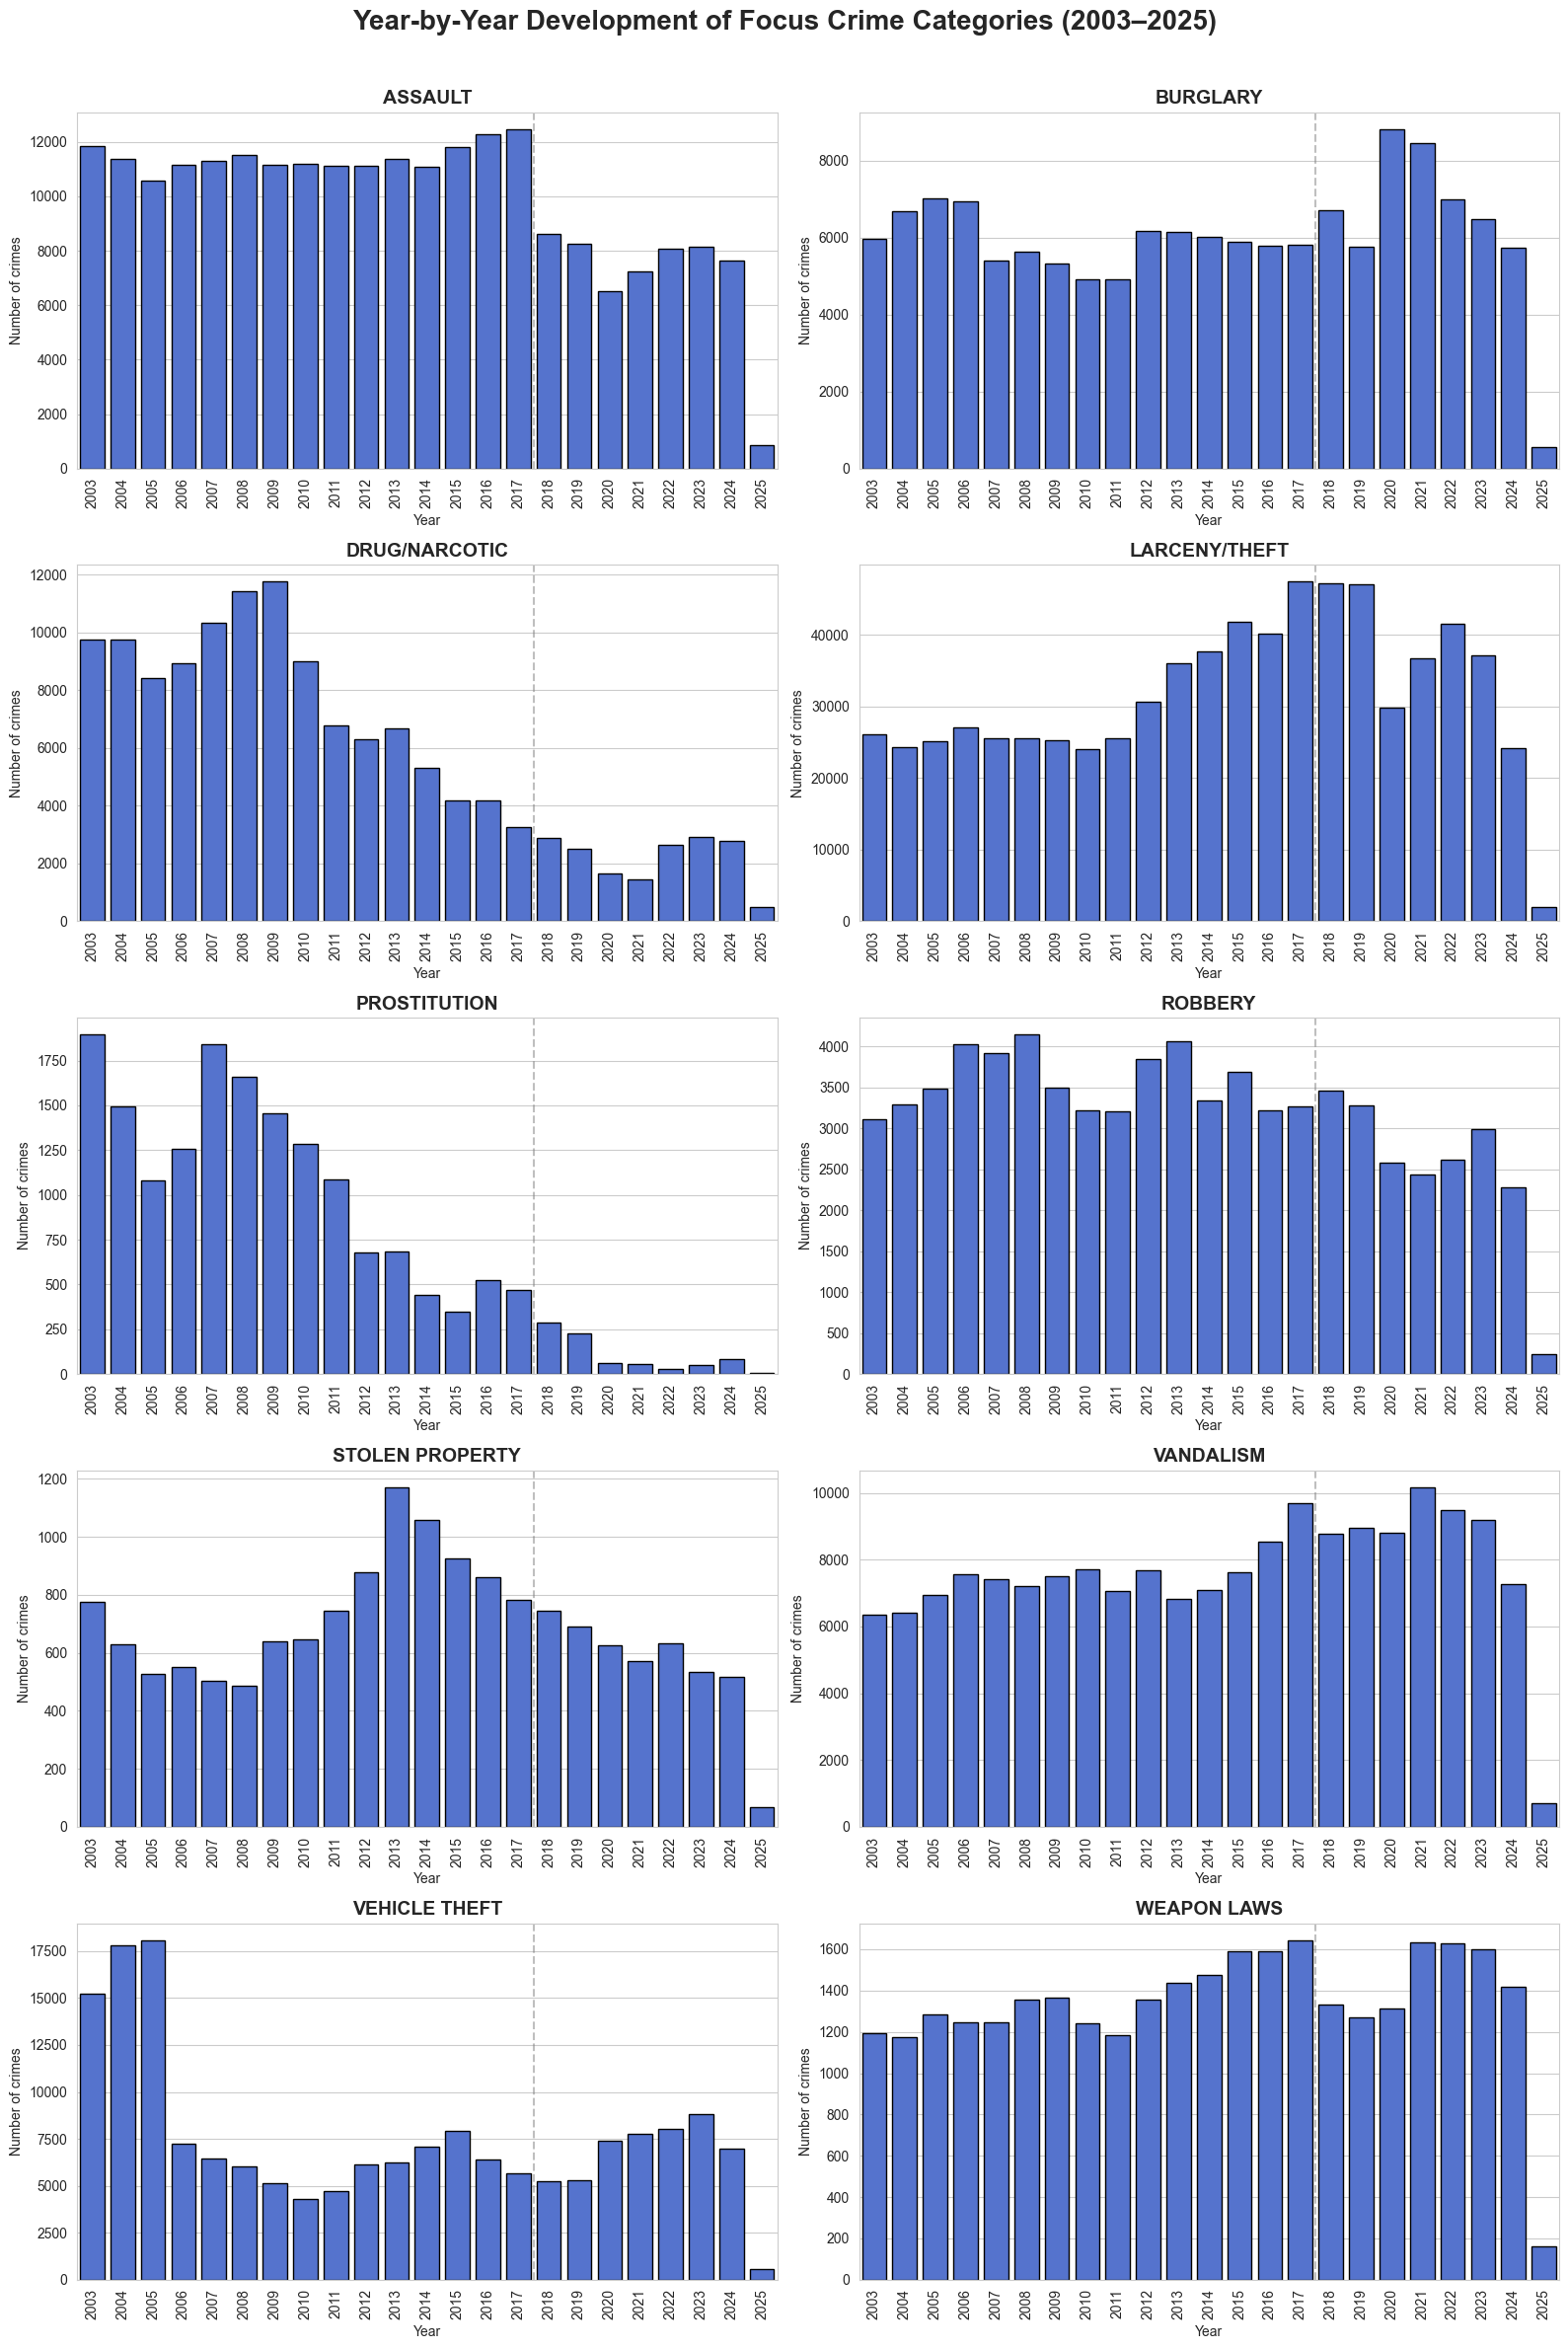

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

focuscrimes = [
    "WEAPON LAWS", "PROSTITUTION", "ROBBERY", "BURGLARY", "ASSAULT", 
    "DRUG/NARCOTIC", "LARCENY/THEFT", "VANDALISM", "VEHICLE THEFT", "STOLEN PROPERTY"
]

# Filter the dataframe to include only focus crimes
df_focus = df[df["Incident Category"].isin(focuscrimes)]
df_focus["Year"] = df_focus["Incident Date"].dt.year
crime_counts = df_focus.groupby(["Incident Category", "Year"]).size().reset_index(name="Count")

# Set up plotting environment
sns.set_style("whitegrid")
num_crimes = len(focuscrimes)
fig, axes = plt.subplots(nrows=num_crimes//2 + num_crimes % 2, ncols=2, figsize=(16, num_crimes*2.5))
axes = axes.flatten()

# Plot each crime category clearly and separately
for i, crime in enumerate(sorted(focuscrimes)):
    crime_data = crime_counts[crime_counts["Incident Category"] == crime]
    sns.barplot(ax=axes[i], x="Year", y="Count", data=crime_data, color="royalblue", edgecolor="black")
    axes[i].set_title(crime, fontsize=14, fontweight="bold")
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Number of crimes")
    axes[i].tick_params(axis="x", rotation=90)

    # Add vertical dashed line marking dataset boundary at 2018
    if 2018 in crime_data["Year"].values:
        idx_2018 = crime_data[crime_data["Year"] == 2018].index[0] - crime_data.index[0] - 0.5
        axes[i].axvline(idx_2018, linestyle="--", color="gray", alpha=0.5)

if num_crimes % 2 != 0:
    fig.delaxes(axes[-1])

plt.suptitle("Year-by-Year Development of Focus Crime Categories (2003–2025)", fontsize=20, fontweight="bold")
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


Looking at the year-by-year crime trends from 2003 to 2024, we notice distinct patterns for Drug/Narcotic, Vehicle Theft, and Weapon Laws offenses. 

Drug/Narcotic crimes peaked noticeably between 2007 and 2009, followed by a clear and consistent decline in subsequent years, likely indicating either decreased incidents or shifting enforcement strategies. In contrast, Vehicle Theft incidents were highest during 2004-2005, before dropping significantly. However, from 2016 onward, there's an evident upward trend, suggesting a resurgence of such crimes. Finally, crimes related to Weapon Laws stayed relatively stable across the years with slight fluctuations, notably rising around 2016-2017 and maintaining a higher rate in recent years.

Overall, these trends highlight important shifts in crime patterns, which may reflect changing societal factors, evolving law enforcement priorities, or external economic and policy influences. Further investigation into underlying causes would help in effectively addressing and mitigating these crimes.

# Part 2 

## Excercise: Data Visualization questions for the lecture.

- **What is the difference between data and metadata? How does that relate to the GPS tracks-example?**

    - The difference between data and metadata is that the data would be the actual 
    information collected so based on the GPS track-example the data would be the GPS 
    tracks showing the exact path taken while metadata data that provides information about other data so basically the date, time, device used, how they were record, or any description related to the GPS tracks.
    
- **Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that is difficult for the human eye. Explain why your example is difficult.**

    - We agree with the conclusion on the human eye is a great tool for data analysis. The human eye is very good at spotting patterns, trends, and irregularities, which helps when analyzing visual data like maps or graphs. However, it struggles when it comes to accurately estimating quantities when there are large amounts of data. This is because our brains are not naturally designed to count or measure with precision just by looking, especially if the data is complex or if there are too many points at once.

- **Simpson's paradox is hard to explain. Come up with your own example - or find one on line.**
    
    - Imagine we have 2 hospitals. Hospital A & Hospital B. In Hospital A, 90% of severely ill patients survive, and 95% of mildly ill patients survive. While in Hospital B, 85% of severely ill patients survive, and 90% of mildly ill patients survive. Based on this Hospital A looks like the better / safer hospital. However what if we look on the overall survival rate, Hospital B might actually has a higher survival rate than Hospital A. This is because Hospital B might treat way more mildly ill patients (who have high survival rates) than severely ill ones. Meanwhile, Hospital A treats more severely ill patients, which drags down its overall average survival rate.

- **In your own words, explain the differnece between exploratory and explanatory data analysis.**
 
    - Exploratory data analysis, is when you explore the data, trying to understand its pattern, trends and possible connections. We are in the starting phase where the unknown is getting explored and researched, questions are being ask and ideas are forming. While Explanatory data analysis is when we already have a great understanding of the data as it has already been explored and test. We are in a phase where the research is completed and ready to be explained and presentet to others in a clear and structered way. 

## Exercise: Nice plots.

- **Create a list of 10 rules for nice plots based on the video.**

---

**1. Use subplots for comparable Data**
- Avoid endless scrolling with plot after plot.
- Combine related plots into subplots for better organization and comparability.

---

**2. Tight layout will give a better presentation**
- Use `tight_layout()` or similar tricks to reduce unnecessary whitespace and make plots fit better on a page.

---

**3. Always have labels on axes & legends**
- Every axis needs a clear label (with units if necessary), and all plots should have a legend if multiple data series exist.
- To make the plot much more meaningful.

---

**4. Use Meaningful Tick Marks & Values**
- Use meaningful values (e.g., whole weeks, round numbers) that make sense to the reader.

---

**5. Beware of Auto-Zoomed Axes (Y-Axis Cropping)**
- Plots should show the full range when appropriate.

---

**6. Match Axes in Subplots for Comparability**
- If you’re comparing datasets side by side, make sure the axes are the same across subplots.

---

**7. Maximize Data-Ink Ratio (Tufty Rule)**
- Show only the necessary information.
- No unnecessary gridlines, shadows, or decoration.

---

**8. Choose Good Fonts & Aesthetics**
- Use a clean font, makes the plots cleaner and nicer.

---

**9. Write Great Captions**
- Write a meaning caption, explain what the plot shows, what to look for in the data, etc.

---

**10. Think About Plot Context (Whole Story)**
- Combine title, labels, caption, and visual clarity to make your plot tell a story on its own.



# Part 3 
## Exploring other types of plots for temporal data
- Calendar plot 
- Polar bar chart



## Calendar plot 

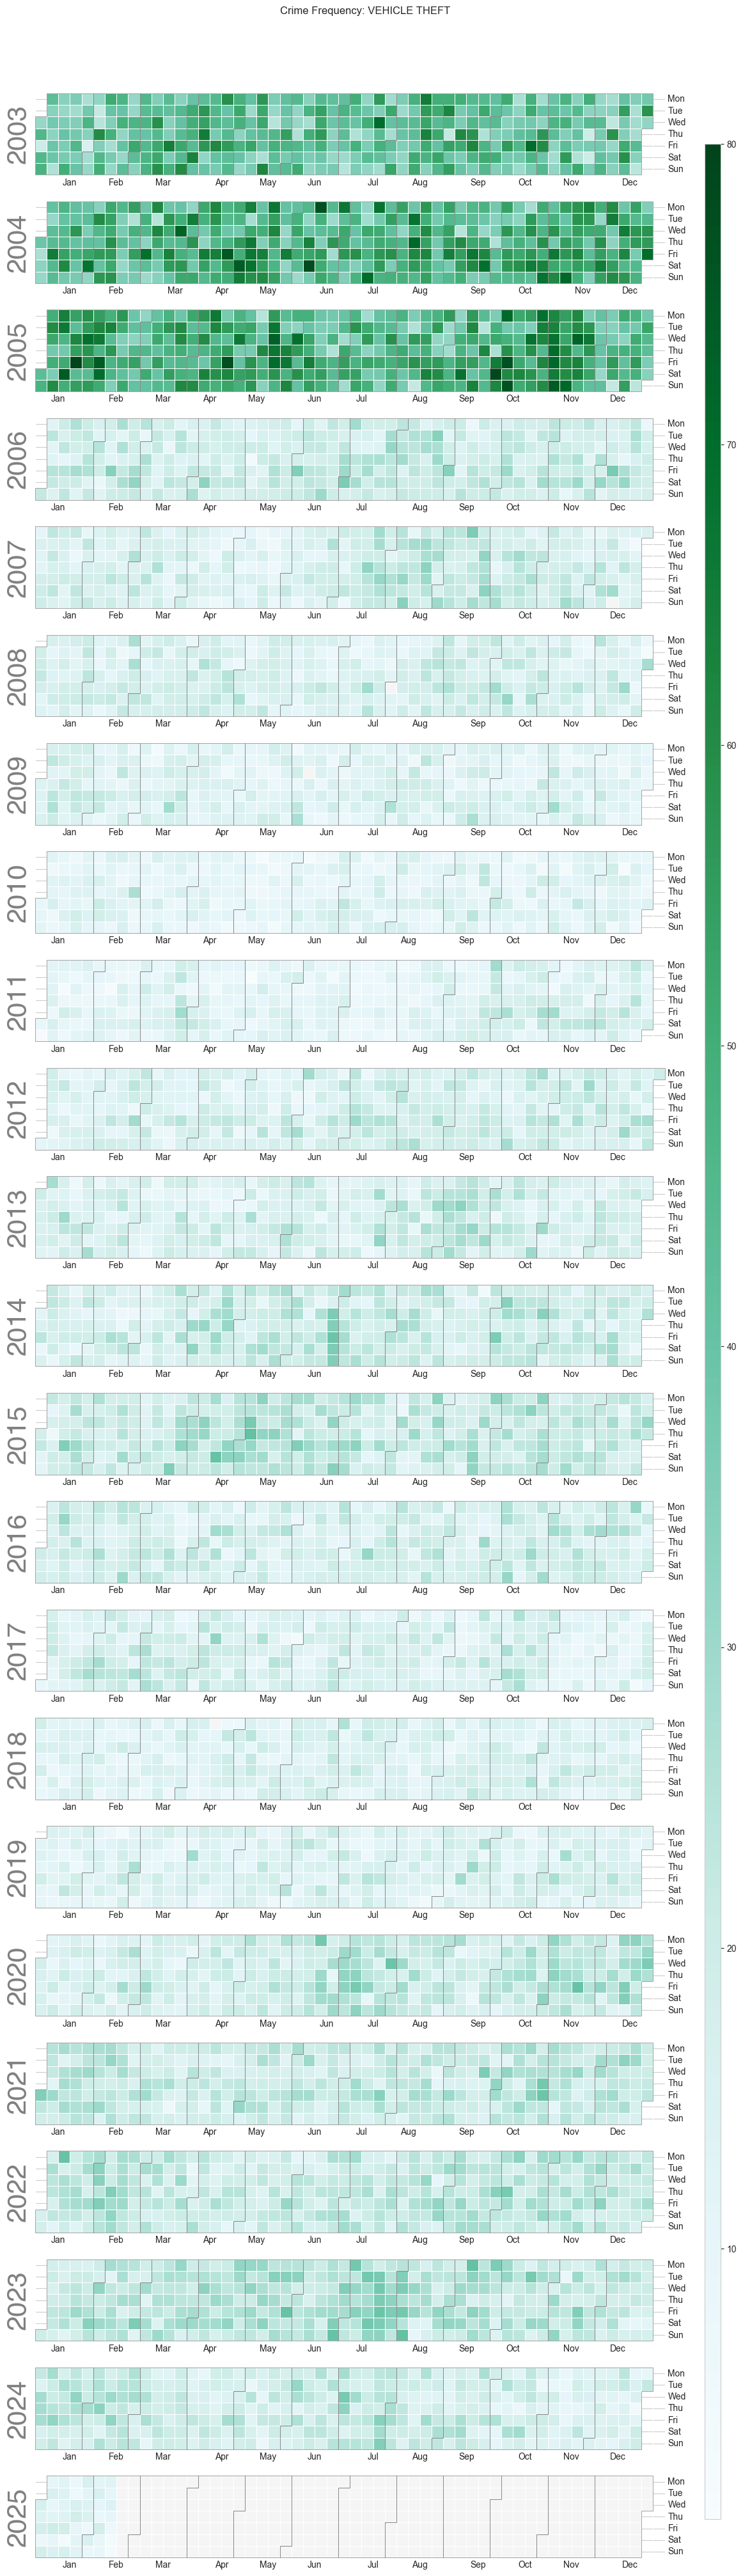

In [10]:
import calplot

# Select a specific crime type 
crime_type = "VEHICLE THEFT" 

# Aggregate crime counts per day for the selected crime type
crime_daily = df[df["Incident Category"] == crime_type].groupby("Incident Date").size()

# Plot the calendar heatmap
calplot.calplot(crime_daily, cmap="BuGn", colorbar=True, suptitle=f"Crime Frequency: {crime_type}", linewidth=0.5, dropzero=True, edgecolor="gray")

# Show the plot
plt.show()


Based on the calendar plot, it can be seen that in San Francisco from 2003 to 2023 highlights a striking trend. The years 2003 to 2005 show a significantly higher frequency of vehicle thefts compared to the following years, with crime rates appearing consistently high throughout these years. However, from 2006 onwards, there is a noticeable decline, with thefts becoming less frequent and relatively stable after 2010 than the early 2000. However it is noted that it gets a little worse in 2020 from 2010 but it is no why near the amount it was in the early to midt 2000s.  

## Polar bar chart

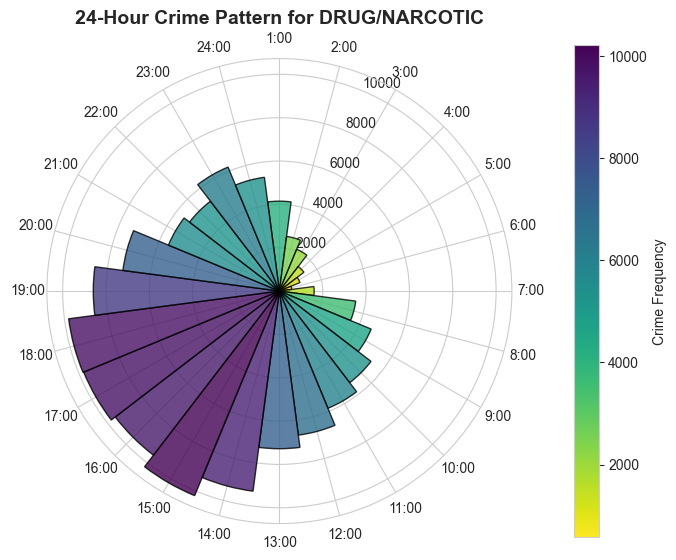

In [11]:
import matplotlib.cm as cm

crime_type = "DRUG/NARCOTIC"  

# Filter dataset for the selected crime
df_crime = df[df["Incident Category"] == crime_type]

# Aggregate crime counts per hour (count number of occurrences of each hour)
crime_hourly = df_crime["Incident Time"].value_counts().sort_index()

angles = np.linspace(0, 2 * np.pi, 24, endpoint=False)  
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

# Normalize crime data for color mapping
norm = plt.Normalize(vmin=crime_hourly.min(), vmax=crime_hourly.max())
colors = cm.viridis_r(norm(crime_hourly))

# Bar chart in polar coordinates
bars = ax.bar(angles, crime_hourly, width=np.pi/12, bottom=0, color=colors, alpha=0.8, edgecolor="black")

sm = plt.cm.ScalarMappable(cmap=cm.viridis_r, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, shrink=0.8, pad=0.1)
cbar.set_label("Crime Frequency")

# Format the polar plot
ax.set_theta_zero_location("N")  
ax.set_theta_direction(-1)  
ax.set_xticks(angles)  
ax.set_xticklabels([f"{h}:00" for h in range(1, 25)])  # Adjust hour labels to 1-24
ax.set_title(f"24-Hour Crime Pattern for {crime_type}", fontsize=14, fontweight="bold")

plt.show()


Based on the polar plot it is revealed the that drug/narcotic related crimes peak between 1 PM and 6 PM, with frequencies ranging between 8000 and 9000 incidents. This suggests increased drug activity during the late afternoon and early evening. In contrast, crime occurrences are significantly lower during the early morning hours (midnight to 6 AM), as indicated by the lighter-colored and smaller bars.

# Part 4

## Excercise Part 1: Connecting the dots and recreating plots from DAOST but using our own favorite dataset.

Let's make a jitter-plot (that is, code up something like Figure 2-1 from DAOST from scratch), but based on SF Police data. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the exact time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the x-axis and create vertical jitter.

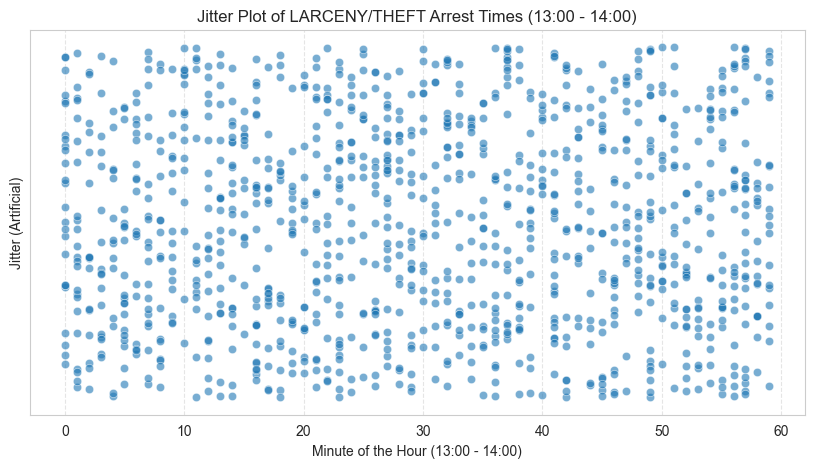

In [13]:
# Convert "Incident Time" to extract hours correctly
df["Hour"] = pd.to_numeric(df["Incident Time"], errors="coerce")

# Generate random "Minute" values (since dataset only has Hour)
df["Minute"] = np.random.randint(0, 60, size=len(df))

# Select a crime type and filter a time interval (6 months)
crime_type = "LARCENY/THEFT"
start_date = "2023-01-01"
end_date = "2023-06-30"
selected_hour = 13  

df_filtered = df[
    (df["Incident Category"] == crime_type) &
    (df["Incident Date"] >= start_date) &
    (df["Incident Date"] <= end_date) &
    (df["Hour"] == selected_hour)
].copy()  

# Create vertical jitter using random values
df_filtered["Jitter"] = np.random.uniform(-0.3, 0.3, size=len(df_filtered))

# Plot jitter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_filtered["Minute"], y=df_filtered["Jitter"], alpha=0.6)

# Labels and aesthetics
plt.xlabel("Minute of the Hour (13:00 - 14:00)")
plt.ylabel("Jitter (Artificial)")
plt.title(f"Jitter Plot of {crime_type} Arrest Times (13:00 - 14:00)")
plt.yticks([])  
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

This jitter plot visualizes the distribution of Larceny/Theft arrests occurring between 13:00 and 14:00.

Key Insights:
Dense and evenly spread points across all minutes suggest that arrests are recorded consistently throughout the hour.
No visible clustering at specific minutes—this could indicate that police reports do not record exact minutes accurately but rather round them.
The random vertical jitter is added to prevent overplotting and provide a clearer view of data density.

What This Plot Reveals:
Larceny/Theft arrests happen continuously across the hour rather than in bursts.
Data precision might be limited—officers may not always record precise arrest times.
If arrests were concentrated at specific minutes, it would suggest a pattern (e.g., scheduled patrols, organized crime waves).

In [14]:
crime_types = df["Incident Category"].value_counts()
print(crime_types.head(20))  # See top crime types


Incident Category
LARCENY/THEFT                  728284
ASSAULT                        226751
VANDALISM                      174951
VEHICLE THEFT                  174573
BURGLARY                       138195
DRUG/NARCOTIC                  133499
ROBBERY                         73272
WEAPON LAWS                     30740
DISORDERLY CONDUCT              25883
TRESPASS                        18649
PROSTITUTION                    17008
STOLEN PROPERTY                 15565
DRUNKENNESS                      9668
DRIVING UNDER THE INFLUENCE      5556
Name: count, dtype: int64


Last time, we did lots of bar-plots. Today, we'll play around with histograms (creating two crime-data based versions of the plot-type shown in DAOST Figure 2-2). I think the GPS data could be fun to see this way.
This time, pick two crime-types with different geographical patterns and a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like numpy.histogram. This function gives you the counts and then you do your own plotting.

Incident Category
BURGLARY         3253
DRUG/NARCOTIC    1470
Name: count, dtype: int64


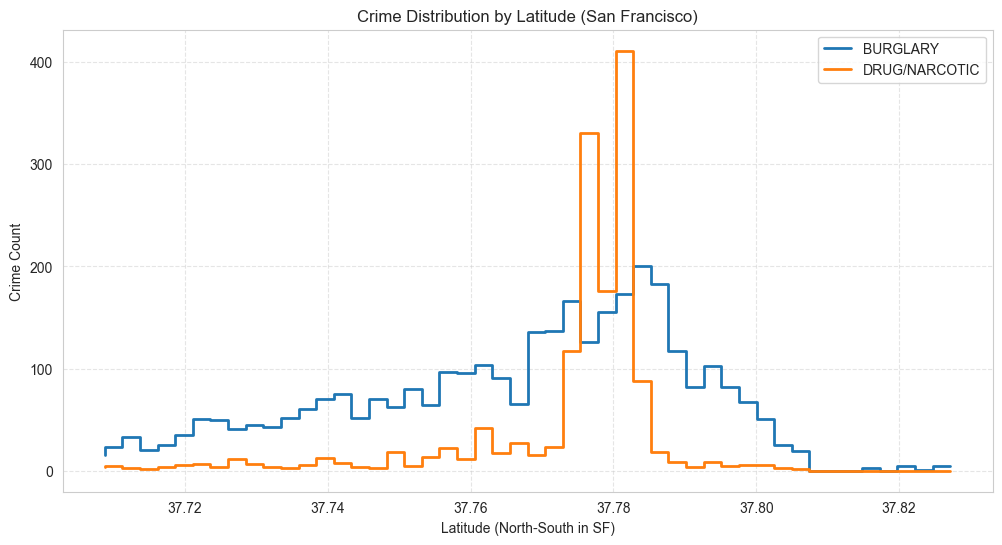

In [16]:
# Define selected crime types
crime_types = ["BURGLARY", "DRUG/NARCOTIC"]
time_period = ("2023-01-01", "2023-06-30")  # 6-month interval

# Filter dataset for selected crimes and time period
df_filtered = df[
    (df["Incident Category"].isin(crime_types)) &
    (df["Incident Date"] >= time_period[0]) &
    (df["Incident Date"] <= time_period[1])
]

# Print number of crimes per category after filtering
print(df_filtered["Incident Category"].value_counts())

# Bin latitudes (50 bins across SF)
num_bins = 50
lat_min, lat_max = df_filtered["Latitude"].min(), df_filtered["Latitude"].max()
lat_bins = np.linspace(lat_min, lat_max, num_bins)

# Plot histograms for each crime type
plt.figure(figsize=(12, 6))
for crime in crime_types:
    latitudes = df_filtered[df_filtered["Incident Category"] == crime]["Latitude"].dropna()
    counts, bin_edges = np.histogram(latitudes, bins=lat_bins)

    plt.step(bin_edges[:-1], counts, label=f"{crime}", linewidth=2)  # Step plot for clarity

# Labels and aesthetics
plt.xlabel("Latitude (North-South in SF)")
plt.ylabel("Crime Count")
plt.title("Crime Distribution by Latitude (San Francisco)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Show plot
plt.show()


This step histogram compares the geographical distribution of Burglary and Drug/Narcotic crimes across different latitudes in San Francisco.

Key Insights:
Burglary (blue line) is more evenly spread across different latitudes but shows a clear peak around 37.78 latitude, suggesting a concentration of burglaries in specific areas.
Drug/Narcotic crimes (orange line) are highly concentrated at one specific latitude (~37.78), showing a much sharper peak compared to burglary.
The sharp peak in Drug/Narcotic crimes suggests a major hotspot, possibly near a known high-crime area such as Tenderloin or Mission District.
Burglary distribution is broader, indicating that this crime type is not as tied to a single location but occurs in multiple areas of the city.
What This Plot Reveals:
Drug/Narcotic offenses are more geographically concentrated, possibly due to specific high-activity areas.
Burglary is more dispersed, meaning it affects a broader range of neighborhoods.
This spatial analysis could help law enforcement focus resources on areas with high crime concentration.

Next up is using the plot-type shown in Figure 2-4 from DAOST, but with the data you used to create Figure 2.1. There is not a single great way to create kernel density plots in Python. Here, you'll finde a pandas based strategy, but you can also use gaussian_kde from scipy.stats (for an example, check out this stackoverflow post) or you can use seaborn.kdeplot. There is also another nice tutorial for KDE plots here. Or ask your LLM what it recommends.

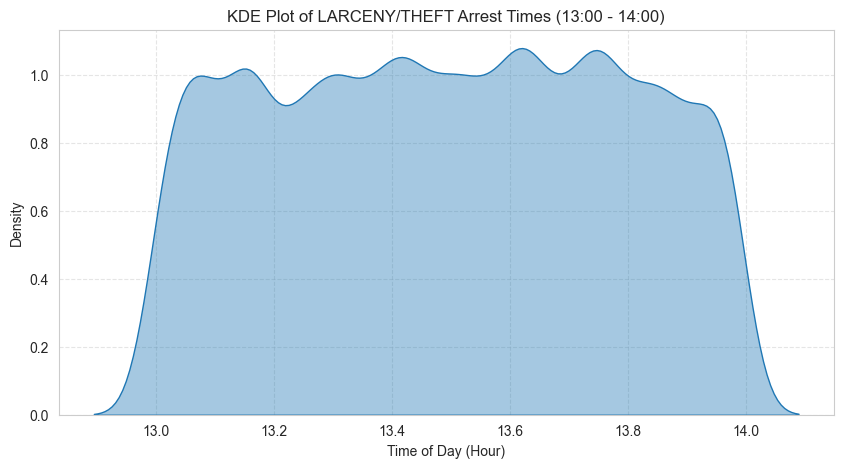

In [23]:
# Select the same data as Figure 2-1 (LARCENY/THEFT crimes between 13:00 - 14:00)
crime_type = "LARCENY/THEFT"
start_date = "2023-01-01"
end_date = "2023-06-30"
selected_hour = 13  

# Ensure "Hour" is extracted properly
df["Hour"] = pd.to_numeric(df["Incident Time"], errors="coerce")

df_filtered = df[
    (df["Incident Category"] == crime_type) &
    (df["Incident Date"] >= start_date) &
    (df["Incident Date"] <= end_date) &
    (df["Hour"] == selected_hour)
].copy()

# Generate random "Minute" values since we only have hour-level data
df_filtered["Minute"] = np.random.randint(0, 60, size=len(df_filtered))

# Convert time into fractional hours (e.g., 13:30 → 13.5)
df_filtered["Time (Fractional)"] = df_filtered["Hour"] + (df_filtered["Minute"] / 60)

# KDE plot using Seaborn
plt.figure(figsize=(10, 5))
sns.kdeplot(df_filtered["Time (Fractional)"], bw_adjust=0.5, fill=True, alpha=0.4)

# Labels and aesthetics
plt.xlabel("Time of Day (Hour)")
plt.ylabel("Density")
plt.title(f"KDE Plot of {crime_type} Arrest Times (13:00 - 14:00)")
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()


Now grab 25 random timepoints from the dataset (of 1000-10000 original data) you've just plotted and create a version of Figure 2-4 based on the 25 data points. Does this shed light on why I think KDEs can be misleading?

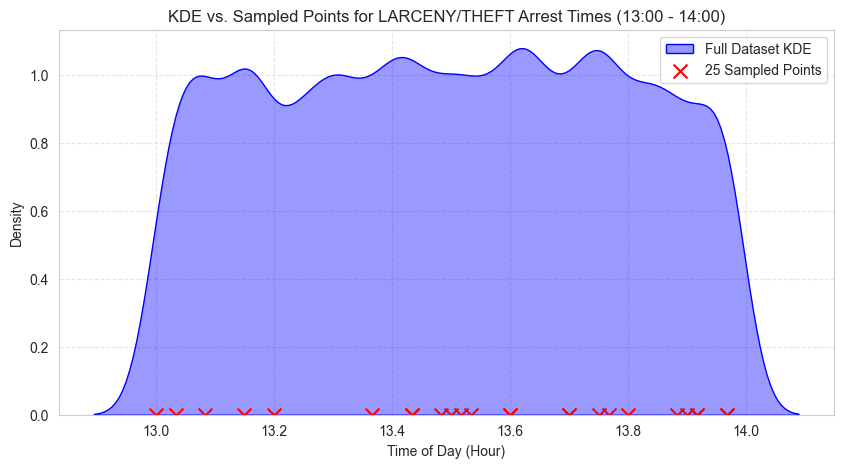

In [27]:
import random

# Randomly sample 25 points from the filtered dataset
df_sampled = df_filtered.sample(n=25, random_state=42)

# KDE plot for the original full dataset
plt.figure(figsize=(10, 5))
sns.kdeplot(df_filtered["Time (Fractional)"], bw_adjust=0.5, fill=True, alpha=0.4, color="blue", label="Full Dataset KDE")

# Scatter plot of the 25 randomly selected points
plt.scatter(df_sampled["Time (Fractional)"], np.zeros(len(df_sampled)), color="red", marker="x", s=100, label="25 Sampled Points")

# Labels and aesthetics
plt.xlabel("Time of Day (Hour)")
plt.ylabel("Density")
plt.title(f"KDE vs. Sampled Points for {crime_type} Arrest Times (13:00 - 14:00)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Show plot
plt.show()


Key Observations
The KDE plot (blue) suggests a smooth and continuous crime distribution.
However, when looking at the 25 sampled points (red Xs):
You can see that the true data points are much sparser than what the KDE suggests.
The peaks and valleys in the KDE might be artificial, depending on the kernel bandwidth.
Why is this misleading?
KDE smooths over gaps in data, even when real events are not evenly spread.
If we only had 25 points, the KDE curve might make us believe that there are more crimes at times where no actual crimes exist.


KDE is useful for detecting trends, but it hides gaps in data.
A small dataset can lead to fake smoothness that does not represent reality.
Always double-check KDE results against raw data points to avoid misinterpretation!

## Now we'll work on creating two versions of the plot in Figure 2-11, but using the GPS data you used for your version of Figure 2-2. Comment on the result. It is not easy to create this plot from scracth.


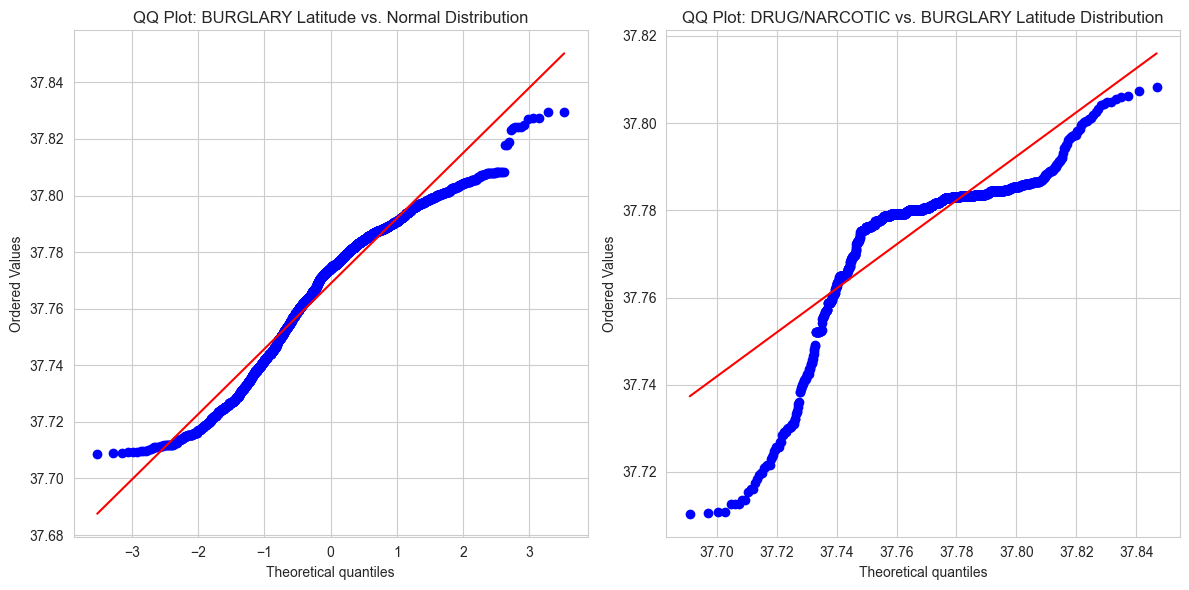

In [28]:
import scipy.stats as stats

# Select the same crime types from Figure 2-2 (BURGLARY vs. DRUG/NARCOTIC)
crime_types = ["BURGLARY", "DRUG/NARCOTIC"]
time_period = ("2023-01-01", "2023-06-30")  # 6-month interval

# Filter dataset for selected crimes and time period
df_filtered = df[
    (df["Incident Category"].isin(crime_types)) &
    (df["Incident Date"] >= time_period[0]) &
    (df["Incident Date"] <= time_period[1])
]

# Extract latitude data for each crime type
lat_burglary = df_filtered[df_filtered["Incident Category"] == "BURGLARY"]["Latitude"].dropna()
lat_drug = df_filtered[df_filtered["Incident Category"] == "DRUG/NARCOTIC"]["Latitude"].dropna()

# Create figure for QQ plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# QQ Plot: Compare BURGLARY Latitudes to Normal Distribution
stats.probplot(lat_burglary, dist="norm", plot=axes[0])
axes[0].set_title("QQ Plot: BURGLARY Latitude vs. Normal Distribution")

# QQ Plot: Compare BURGLARY vs. DRUG/NARCOTIC Latitudes
stats.probplot(lat_drug, dist=stats.norm(loc=lat_burglary.mean(), scale=lat_burglary.std()), plot=axes[1])
axes[1].set_title("QQ Plot: DRUG/NARCOTIC vs. BURGLARY Latitude Distribution")

# Improve layout
plt.tight_layout()
plt.show()


These QQ (Quantile-Quantile) plots compare the latitude distribution of Burglary and Drug/Narcotic crimes to theoretical distributions.

- Left Plot: Burglary Latitude vs. Normal Distribution
If Burglary latitudes followed a normal distribution, the blue points would align closely with the red diagonal line.
The curved deviation at the extremes suggests that Burglary locations do not perfectly follow a normal distribution.
More clustering around certain latitudes indicates that burglaries are geographically concentrated rather than randomly distributed.
- Right Plot: Drug/Narcotic vs. Burglary Latitude
Instead of comparing to a normal distribution, this plot compares Drug/Narcotic crime locations to Burglary locations.
The significant upward curve suggests that Drug/Narcotic crimes are even more geographically concentrated than Burglary.
This confirms what we saw in the histogram—Drug/Narcotic crimes have a sharp peak at a specific latitude, while Burglary is more spread out.
- What These Plots Reveal That Others Didn't
The normality check shows that Burglary has a broader spread, but it's still not fully normal.
The comparison QQ plot confirms that Drug/Narcotic crimes are disproportionately concentrated in one region.
This method quantifies location differences more precisely than a histogram alone.



OK, we're almost done, but we need some box plots. Here, I'd like you to use the box plots to visualize fluctuations of how many crimes happen per day. We'll use data from the 10 focus crimes defined previously.
For the full time-span of the data, calulate the number of crimes per day within each category for the entire duration of the data.
Create a box-and whiskers plot showing the mean, median, quantiles, etc for all the 10 different focus crimes side-by-side. There are many ways to do this. I like to use matplotlibs's built in functionality, but you can also achieve good results with seaborn or pandas. 

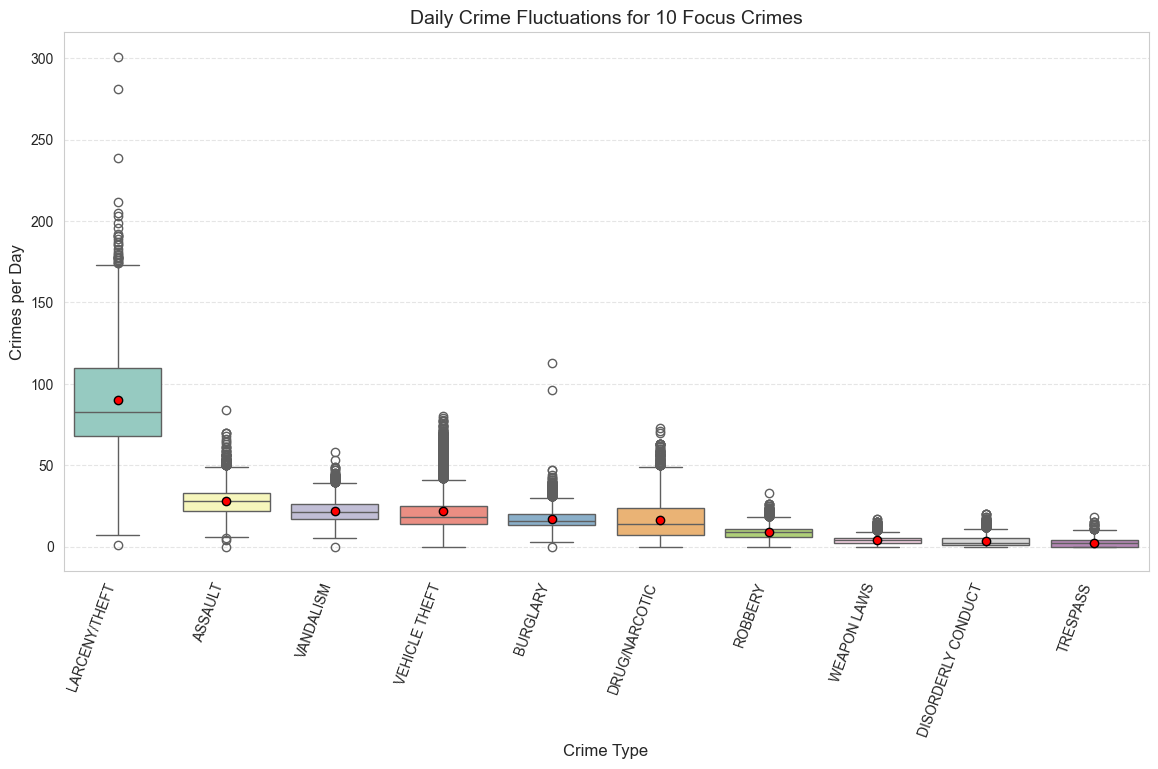

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the 10 focus crimes
focus_crimes = [
    "LARCENY/THEFT", "ASSAULT", "VANDALISM", "VEHICLE THEFT", "BURGLARY",
    "DRUG/NARCOTIC", "ROBBERY", "WEAPON LAWS", "DISORDERLY CONDUCT", "TRESPASS"
]

# Convert 'Incident Date' to datetime format
df["Incident Date"] = pd.to_datetime(df["Incident Date"], errors="coerce")

# Filter for only the focus crimes
df_focus = df[df["Incident Category"].isin(focus_crimes)]

# Count number of crimes per day for each category
daily_counts = df_focus.groupby(["Incident Date", "Incident Category"]).size().unstack(fill_value=0)

# Create an improved box plot
plt.figure(figsize=(14, 7))

# Use seaborn for a better-styled boxplot
sns.boxplot(data=daily_counts[focus_crimes], palette="Set3", showmeans=True, meanprops={"marker":"o","markerfacecolor":"red", "markeredgecolor":"black"})

# Improve readability
plt.xlabel("Crime Type", fontsize=12)
plt.ylabel("Crimes per Day", fontsize=12)
plt.title("Daily Crime Fluctuations for 10 Focus Crimes", fontsize=14)
plt.xticks(rotation=70, ha="right")  # Rotate x-axis labels for readability
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show plot
plt.show()


LARCENY/THEFT has the highest daily fluctuation

The median is high, and the whiskers are long, showing a wide range of crime counts per day.
Many outliers suggest that some days have significantly higher crime spikes.
Other crimes show more stable daily counts

Crimes like TRESPASS, WEAPON LAWS, and DISORDERLY CONDUCT have smaller boxes and short whiskers, meaning less fluctuation in daily crime counts.
Crimes with notable variation:

BURGLARY, VEHICLE THEFT, and DRUG/NARCOTIC show moderate fluctuation with some high outliers.
This suggests some days experience unusual crime spikes.


LARCENY/THEFT has the highest daily fluctuation

The median is high, and the whiskers are long, showing a wide range of crime counts per day.
Many outliers suggest that some days have significantly higher crime spikes.
Other crimes show more stable daily counts

Crimes like TRESPASS, WEAPON LAWS, and DISORDERLY CONDUCT have smaller boxes and short whiskers, meaning less fluctuation in daily crime counts.
Crimes with notable variation:

BURGLARY, VEHICLE THEFT, and DRUG/NARCOTIC show moderate fluctuation with some high outliers.
This suggests some days experience unusual crime spikes.


It Highlights Outliers More Clearly
The whiskers and dots in the box plot explicitly show extreme outliers (unusually high-crime days).
In contrast, KDE and histograms smooth out these spikes, making it harder to spot them.
Example: In Larceny/Theft, some days have 300+ crimes, which wasn’t as clear before.
Key Insight:
Some crimes experience rare but extreme spikes, which could indicate major events, police crackdowns, or seasonal effects.


It Compares Multiple Crime Types Side by Side
Unlike KDEs (which focus on one crime type at a time), the box plot allows us to compare 10 crime types simultaneously.
We can instantly see:
Which crimes are most frequent per day (Larceny/Theft, Assault).
Which crimes are the most stable (Weapon Laws, Trespass).
Which crimes have similar patterns (Vehicle Theft & Burglary have similar daily ranges).
Key Insight:
Some crimes fluctuate daily, while others are more stable and predictable.


It Shows the Median vs. Mean Difference
The red dot represents the mean, and the middle line inside the box is the median.
If the mean is far above the median, it suggests skewness, meaning occasional crime surges drive up the average.
Key Insight:

In Larceny/Theft, the mean is above the median, suggesting high-crime days skew the data.
In Trespass or Weapon Laws, the mean and median are close, meaning crimes occur at a more stable rate.


/var/folders/lr/_ynnd4hs17b6vnnx6lbz3hzh0000gn/T/ipykernel_84835/884037535.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_focus, x="Incident Category", y="Time (Fractional)", palette="Set3", showmeans=True,


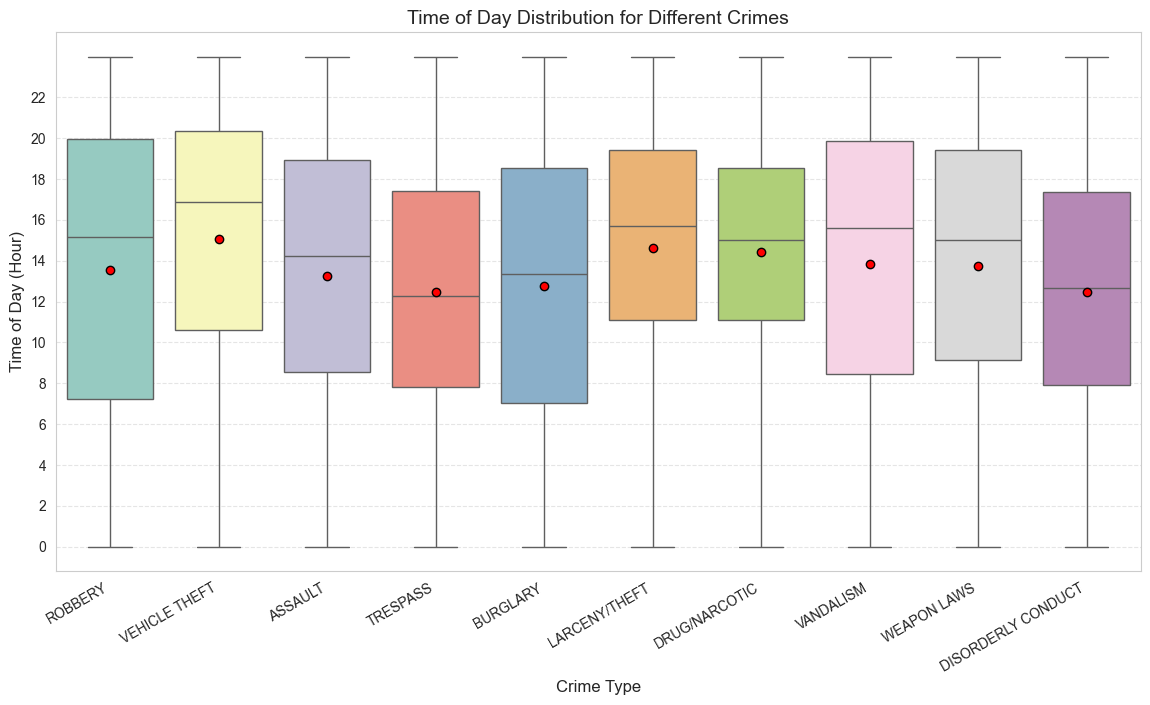

In [32]:
# Define the 10 focus crimes
focus_crimes = [
    "LARCENY/THEFT", "ASSAULT", "VANDALISM", "VEHICLE THEFT", "BURGLARY",
    "DRUG/NARCOTIC", "ROBBERY", "WEAPON LAWS", "DISORDERLY CONDUCT", "TRESPASS"
]

# Convert 'Incident Time' to proper format (Fractional Hours)
df["Hour"] = pd.to_numeric(df["Incident Time"], errors="coerce")  
df["Minute"] = np.random.randint(0, 60, size=len(df))  
df["Time (Fractional)"] = df["Hour"] + (df["Minute"] / 60)  

# Filter for focus crimes and drop NaNs
df_focus = df[df["Incident Category"].isin(focus_crimes)][["Incident Category", "Time (Fractional)"]].dropna()

# Create the box plot
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_focus, x="Incident Category", y="Time (Fractional)", palette="Set3", showmeans=True,
            meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "black"})

# Improve readability
plt.xlabel("Crime Type", fontsize=12)
plt.ylabel("Time of Day (Hour)", fontsize=12)
plt.title("Time of Day Distribution for Different Crimes", fontsize=14)
plt.xticks(rotation=30, ha="right")
plt.yticks(np.arange(0, 24, 2))  
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()


This box plot visualizes the distribution of crimes by time of day across different crime types.

Key Insights:
Most crimes occur throughout the day, as seen by the wide spread of all categories.
The median (black line inside the box) and mean (red dot) for each crime type show when crimes typically occur:
Robbery tends to occur more often in the evening (higher median).
Trespass and Burglary have lower median times, suggesting they are more common in the morning or early afternoon.
Larceny/Theft and Drug/Narcotic offenses have a broad distribution, meaning they happen evenly throughout the day.
The whiskers show the full time range when crimes occur, with some extending close to midnight and early morning hours, indicating that crimes are not strictly tied to business hours.


# Part 5: Putting everything you've learned to work
### Now you've learned about lots of time-series analysis tricks and visualization. That means it's time for you to think for yourself with a slightly more independent exercise.

### Exercise: Using all the tools to understand the temporal trends of prostitution in SF over time.

- It's quite simple really, I'd like you to present your own analysis of what happens to the PROSTITUTION crime type in SF over time.
    - Hint 1: So think about trends over time, does every district show the same behavior?, or the same beahavior over time?, are there hotspots?, etc. A fancy way of saying this is: think about quantifying and explaining spatio-temporal patterns.
    - Hint 2: It's a good idea to think of this exercise as a way to show off what you've learned about data analysis in this and the previous lectures: so it's a good idea to include many of the types of plots from the curriculum so far in your analysis.
- As an extra little thing, I also want you to reflect on the role of data errors in an analysis. Data errors could be things like imprecise GPS points, or imprecise recording of time.

## Temporal Trend Analysis

## Prostitution pr year 

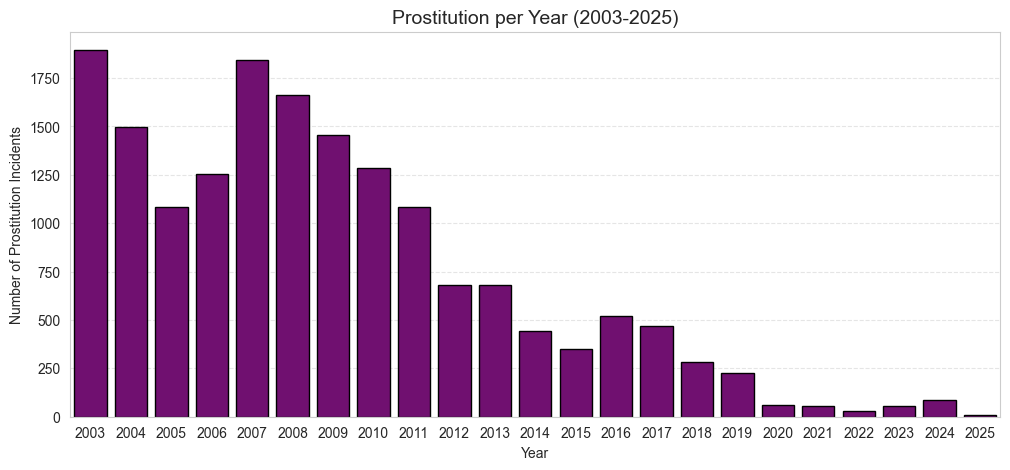

In [33]:
df_prostitution = df[df["Incident Category"] == "PROSTITUTION"].copy()
df_prostitution["Year"] = df_prostitution["Incident Date"].dt.year
prostitution_per_year = df_prostitution["Year"].value_counts().sort_index()

plt.figure(figsize=(12, 5))
sns.barplot(x=prostitution_per_year.index, y=prostitution_per_year.values, color="purple", edgecolor="black")
plt.title("Prostitution per Year (2003-2025)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Prostitution Incidents")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


## Calendar plot

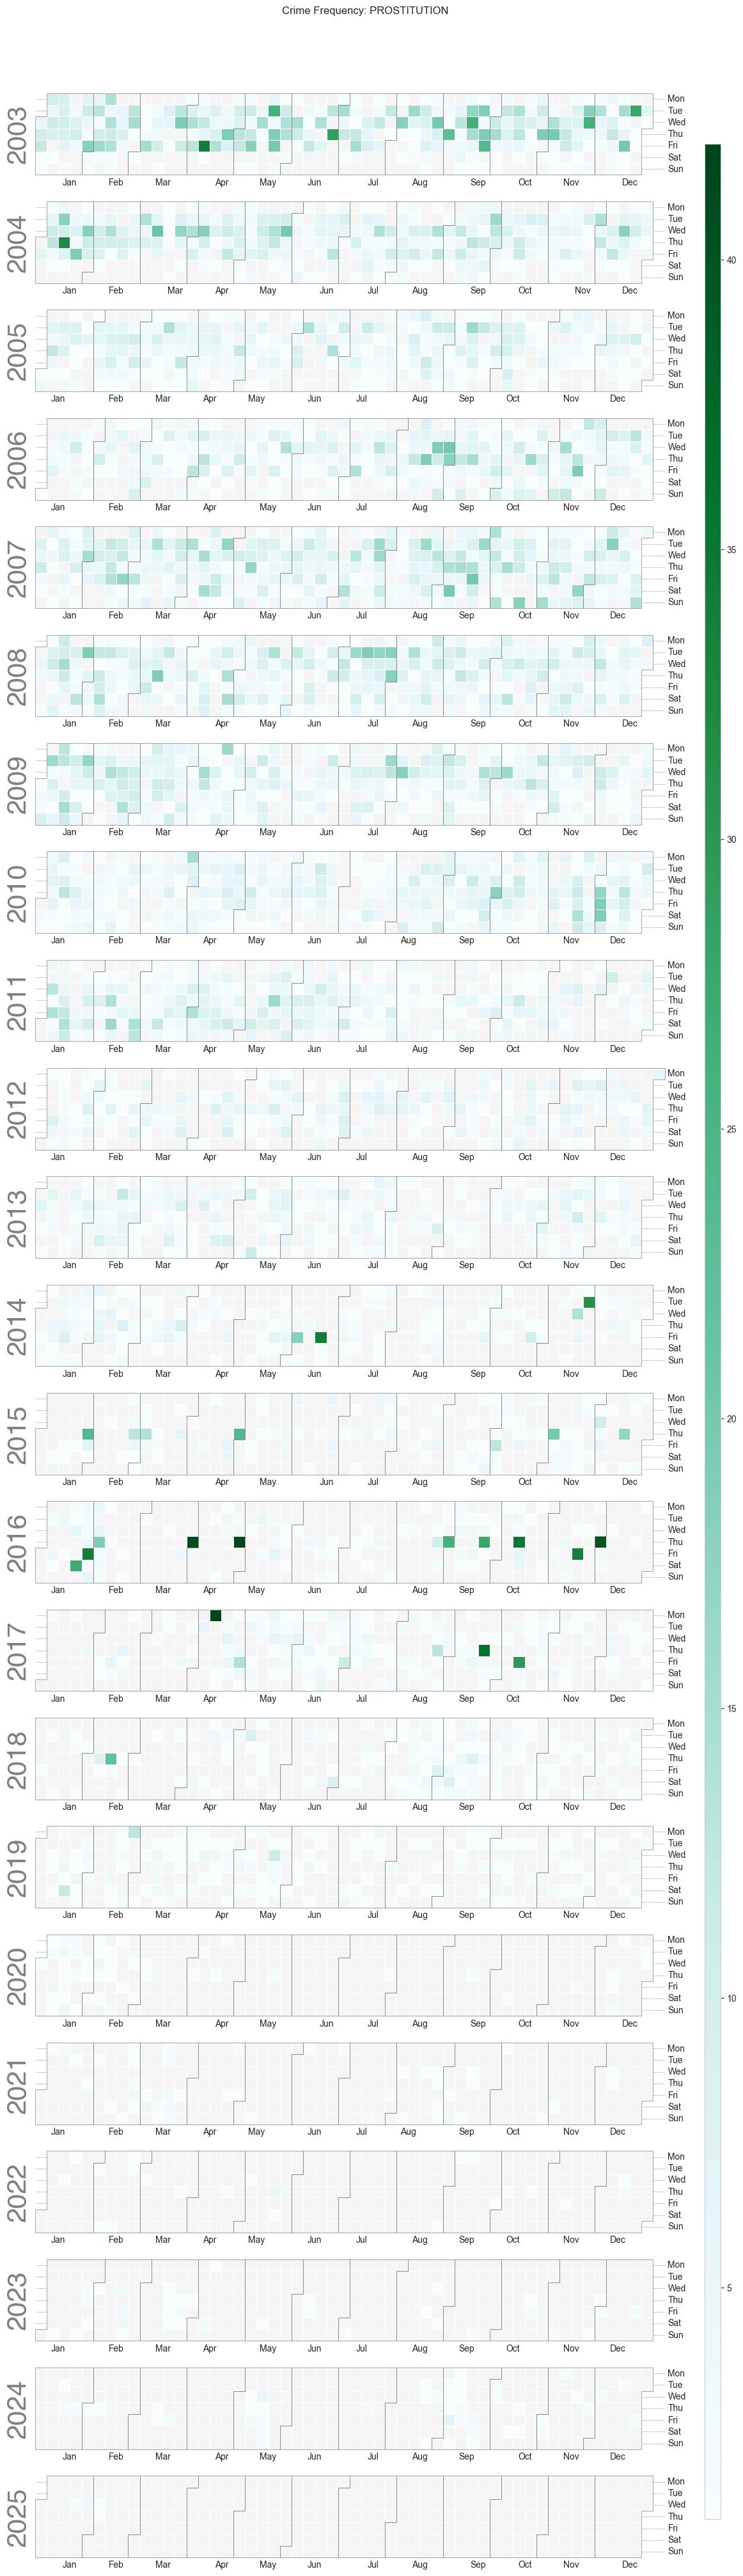

In [76]:
import calplot

# Select a specific crime type 
crime_type = "PROSTITUTION" 

# Aggregate crime counts per day for the selected crime type
crime_daily = df[df["Incident Category"] == crime_type].groupby("Incident Date").size()

# Plot the calendar heatmap
calplot.calplot(crime_daily, cmap="BuGn", colorbar=True, suptitle=f"Crime Frequency: {crime_type}", linewidth=0.5, dropzero=True, edgecolor="gray")

# Show the plot
plt.show()


The barplot and calendar plot together reveal a clear and significant decline in prostitution incidents in San Francisco from 2003 to 2025. The number of recorded incidents was much higher between 2003 and around 2008, followed by a gradual decrease over the next decade. From 2018 onwards, prostitution cases became very rare, indicating either a shift in law enforcement focus, changes in reporting practices, or broader societal changes impacting the occurrence of this crime.

The heatmap does not show a strong or consistent seasonal pattern, meaning prostitution incidents were spread fairly evenly across different months. This suggests that prostitution in San Francisco was not particularly tied to specific times of year but rather influenced by other factors, such as police crackdowns, policy changes, or shifts in how and where these activities occur.

## Prostitution pr Month 

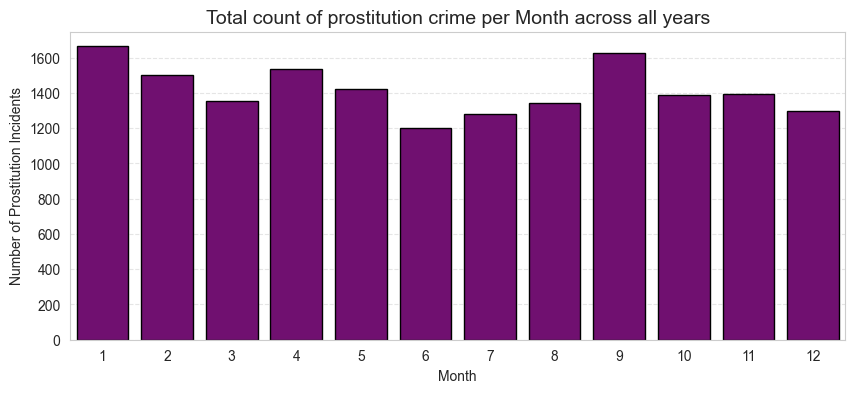

In [34]:
df_prostitution["Month"] = df_prostitution["Incident Date"].dt.month
prostitution_per_month = df_prostitution["Month"].value_counts().sort_index()

plt.figure(figsize=(10, 4))
sns.barplot(x=prostitution_per_month.index, y=prostitution_per_month.values, color="purple", edgecolor="black")
plt.title("Total count of prostitution crime per Month across all years", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Prostitution Incidents")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


Based on the chart, prostitution in San Francisco occurs fairly consistently throughout the year, with notable peaks in January and September. There is a visible dip in June, but overall, the monthly variation is moderate, indicating that prostitution activity remains relatively steady year-round, with some seasonal fluctuations.

## Prostitution pr Week

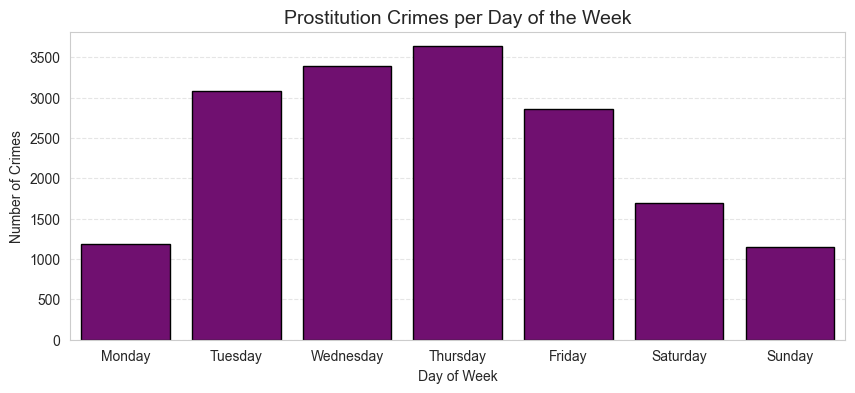

In [36]:

df_prostitution["Day of Week"] = df_prostitution["Incident Date"].dt.day_name()
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
prostitution_per_weekday = df_prostitution["Day of Week"].value_counts().reindex(weekday_order)

plt.figure(figsize=(10, 4))
sns.barplot(x=prostitution_per_weekday.index, y=prostitution_per_weekday.values, color="purple", edgecolor="black")
plt.title("Prostitution Crimes per Day of the Week", fontsize=14)
plt.xlabel("Day of Week")
plt.ylabel("Number of Crimes")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


It can be seen that prostitution crimes in San Francisco peak midweek, especially on Tuesday, Wednesday, and Thursday. Activity drops significantly over the weekend, with Sunday showing the lowest count.

## Calendar plot

## Prostitution crimes by Police District

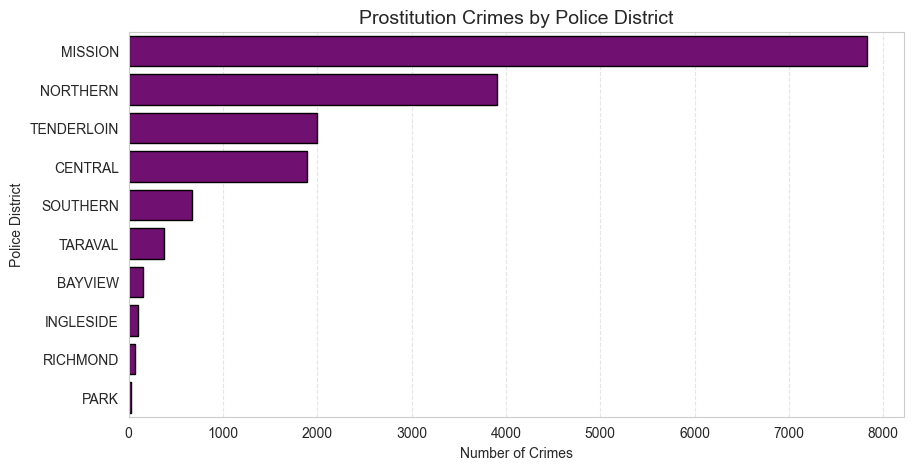

In [72]:
prostitution_by_district = df_prostitution["Police District"].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=prostitution_by_district.values, y=prostitution_by_district.index, color="purple", edgecolor="black")
plt.title("Prostitution Crimes by Police District", fontsize=14)
plt.xlabel("Number of Crimes")
plt.ylabel("Police District")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


The Mission and Northern police districts account for the vast majority of prostitution-related crimes in San Francisco, with Tenderloin and Central also showing relatively high counts. This indicates that prostitution activity is heavily concentrated in a few key areas, while several other districts see very little activity.

## Yearly Trend of Prostitution Crimes Across Police Districts

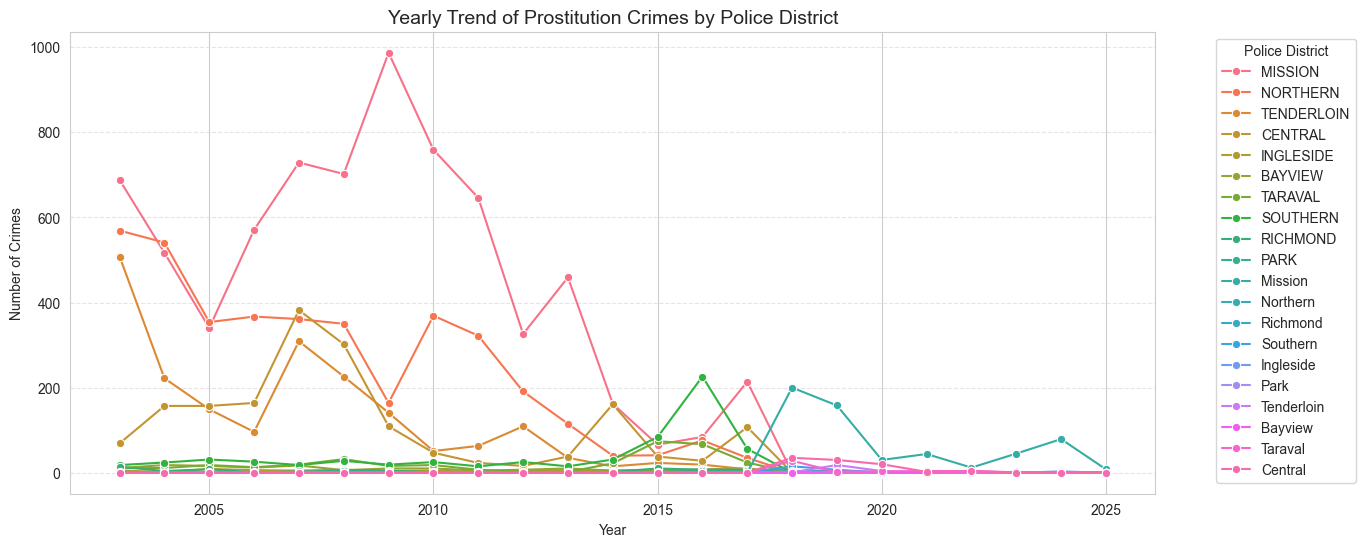

In [40]:
years = df_prostitution['Year'].unique()
districts = df_prostitution['Police District'].unique()

full_index = pd.MultiIndex.from_product([years, districts], names=["Year", "Police District"])

prostitution_trend_by_district = (
    df_prostitution.groupby(["Year", "Police District"]).size()
    .reindex(full_index, fill_value=0)
    .reset_index(name="Count")
)

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=prostitution_trend_by_district,
    x="Year", y="Count", hue="Police District",
    marker="o"
)

plt.title("Yearly Trend of Prostitution Crimes by Police District", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Police District", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


It is highlighted that prostitution crimes have declined sharply across all police districts since the mid-2000s. The Mission and Northern districts consistently reported the highest levels of prostitution-related crimes, particularly during the early years (2003-2010). After 2015, the reported incidents in all districts dropped significantly.

## Heatmap over hotspots for prostitution in San Francisco

In [77]:
import folium
from folium.plugins import HeatMap

# Initialize the map centered on San Francisco
sf_map = folium.Map(location=[37.7749, -122.4194], zoom_start=12)

# Extract coordinates into list format (only rows with valid coordinates)
heat_data = df_prostitution[["Latitude", "Longitude"]].dropna().values.tolist()
HeatMap(heat_data, radius=10, blur=15, max_zoom=1).add_to(sf_map)

sf_map


/var/folders/lr/_ynnd4hs17b6vnnx6lbz3hzh0000gn/T/ipykernel_84835/3641184156.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df_prostitution.pivot_table(index='Police District', columns='Incident Day of Week', aggfunc='size', fill_value=0)


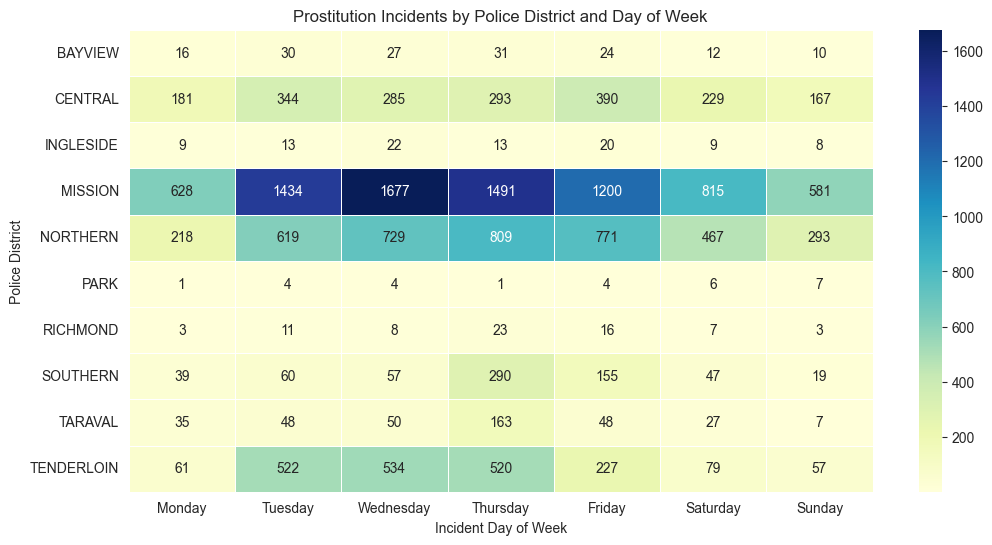

In [46]:
# Standardize all district names to uppercase
df_prostitution['Police District'] = df_prostitution['Police District'].str.upper()

pivot = df_prostitution.pivot_table(index='Police District', columns='Incident Day of Week', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)

plt.title('Prostitution Incidents by Police District and Day of Week')
plt.xlabel('Incident Day of Week')
plt.ylabel('Police District')
plt.show()


The heatmap and spatial analysis reveal clear hotspots of prostitution-related incidents in San Francisco, with the Mission, Tenderloin, and Northern police districts standing out as the most affected areas. These districts consistently report the highest number of incidents across all days of the week, with midweek days like Tuesday, Wednesday, and Thursday showing particularly high activity.

The geographic heatmap confirms that prostitution activity is highly concentrated in central parts of the city, while outer districts such as Richmond, Park, and Ingleside experience very few incidents. This clustering highlights how prostitution hotspots tend to emerge in areas with higher commercial activity, nightlife, and tourism, reinforcing the link between urban dynamics and street-level crime.

Understanding these spatial hotspots, along with daily and weekly patterns, can help law enforcement and policymakers develop more targeted interventions, such as increased patrols during peak times or community outreach programs in high-risk neighborhoods. 

## As an extra little thing, I also want you to reflect on the role of data errors in an analysis. Data errors could be things like imprecise GPS points, or imprecise recording of time.

- Data errors can seriously mess with the accuracy of any analysis. Things like imprecise GPS coordinates or wrongly recorded times can throw off your entire understanding of when and where events happened. This can lead to incorrect patterns, misplaced hotspots, or even false trends. 
Some errors are random (just noise), while others are systematic (pushing all the data in a certain direction). Either way, they make it harder to trust the results. To deal with this, you can clean the data — for example, by removing obvious outliers or smoothing weird spikes. You could also combine data from different sources to cross-check for accuracy.


# Contribution 

## Contribution Table

| Part                                                | Alec | Aya  | Jawahir |
|------------------------------------------------|---------|---------|---------|
| Part 1  |    30%     |     35%    |     35%    |
| Part 2 |    25%     |      25%   |     50%    |
| Part 3               |   50%      |   25%      |   25%      |
| Part 4        |20%          |   60%     |    20%     |
| Part 5               |    40%     |    30%     |    30%     |


